In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

In [2]:
#read csv file
df = pd.read_csv('banking.csv')
print(df.shape)

(41188, 21)


In [3]:
#print dataframe head
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [4]:
#Statistical summery of data df
df.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [5]:
df['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

Percentage of subsription :  11.265417111780131
Percentage of no subscription :  88.73458288821988


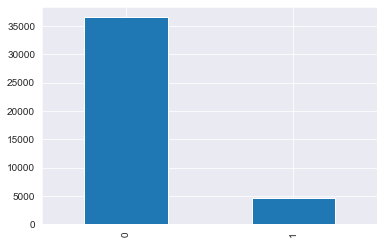

In [6]:
#Check the percentage of 0 to 1
No_sub = len(df[df['y'] == 0])
Sub = len(df[df['y'] == 1])
percent_No_sub = (No_sub/len(df['y'])) * 100
percent_sub = (Sub/len(df['y'])) * 100

print('Percentage of subsription : ',percent_sub)
print('Percentage of no subscription : ', percent_No_sub)


df['y'].value_counts().plot.bar()

In [7]:
# iterated through df and stored data with datatype as 'object' to new variable cat_col

cat_col = [n for n in df.columns if df[n].dtypes == 'object']
cat_col

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [8]:
#obtain the value count of each column holding a categorical data 

for col in cat_col:
    print(col, '\n\n')
    print(df[col].value_counts())
    print("======================" * 4)

job 


admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
marital 


married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
education 


university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64
default 


no         32588
unknown     8597
yes            3
Name: default, dtype: int64
housing 


yes        21576
no         18622
unknown      990
Name: housing, dtype: int64
loan 


no         33950
yes         6248
unknown      990
Name: loan, dtype: int64
contact 


cellular     26144
telephone    

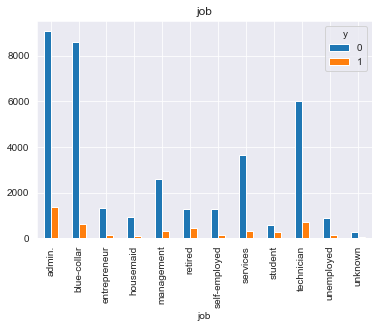

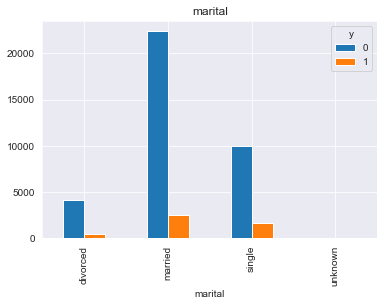

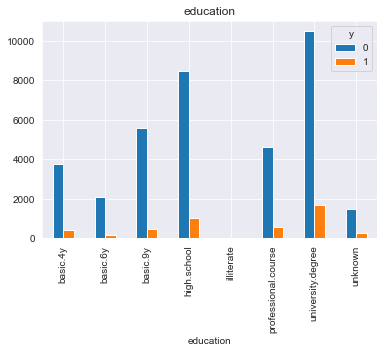

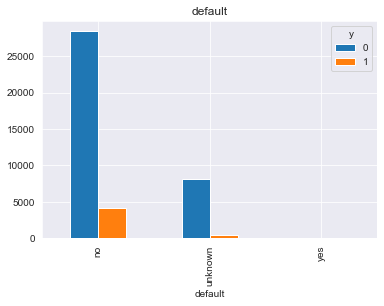

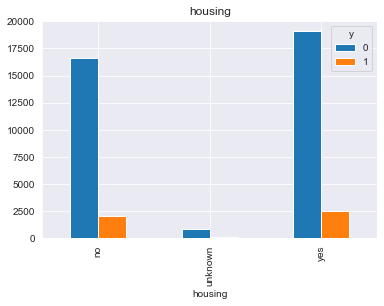

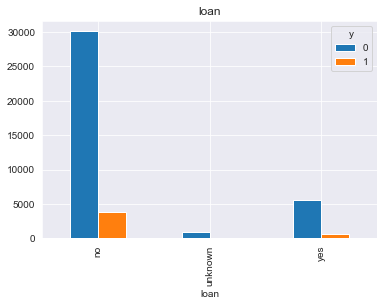

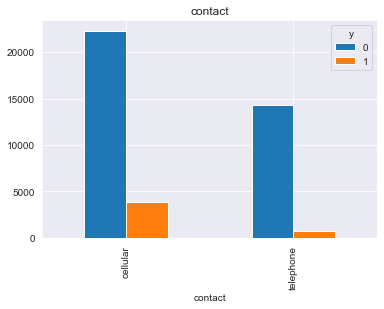

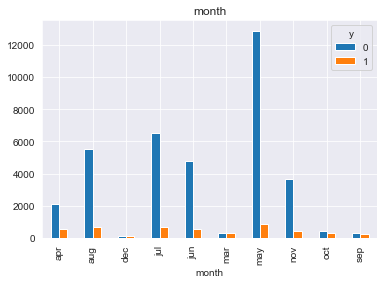

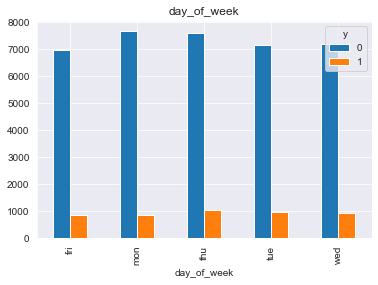

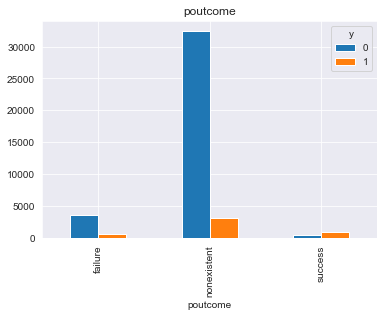

In [9]:
#Visualization from our categorical datas top see if we can get insigts from there
for col in cat_col:
    pd.crosstab(df[col], df.y).plot(kind = 'bar')
    plt.title(col)

In [10]:
contact = ({'cellular':0, 'telephone':1})
df['contact'] = df['contact'].map(contact)

In [11]:
#Create dummy variable for the categorical data and drop first column to avoid dummy varibale trap
df = pd.get_dummies(df,columns = ['job','marital','education','default',
                                   'housing','loan','month',
                                   'day_of_week','poutcome'], drop_first = True)

In [12]:
df.shape

(41188, 54)

In [13]:
from sklearn.utils import resample

X = df.loc[:,df.columns != 'y']
y = df.loc[:,df.columns == 'y']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3 , random_state = 0)

In [14]:
print('shape of X_train : ',len(X_train), '\nshape of y_train : ',len(y_train))
print('\nshape of X_test  : ',len(X_test), '\nshape of y_test  : ',len(y_test))

shape of X_train :  28831 
shape of y_train :  28831

shape of X_test  :  12357 
shape of y_test  :  12357


In [15]:
#train model using logistic regression
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train,y_train)
clf.score(X_train,y_train)

0.9074954042523672

In [16]:
clf.score(X_test,y_test)

0.9113053330096301

In [17]:
y_pred = clf.predict(X_test)

In [18]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,roc_auc_score
clf=GaussianNB()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy score {}".format(accuracy_score(y_test,y_pred)))
print("ROC AUC score {}".format(roc_auc_score(y_test,y_pred)))

Accuracy score 0.8730274338431658
ROC AUC score 0.6997144115734789
